In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
import webbrowser
import geopandas as gpd

## Importing Appended BMMS file

In [3]:
# Read the CSV file into a DataFrame
df = pd.read_csv('bmms_with_traffic_flow1.csv')

## Criticality
Let us first look at the top 30 most critical bridges.

In [4]:
# Sort DataFrame to find top 30 most critical bridges
top_30_critical = df.sort_values(by='Proportion truck', ascending=False).head(30)

###  Visualisations

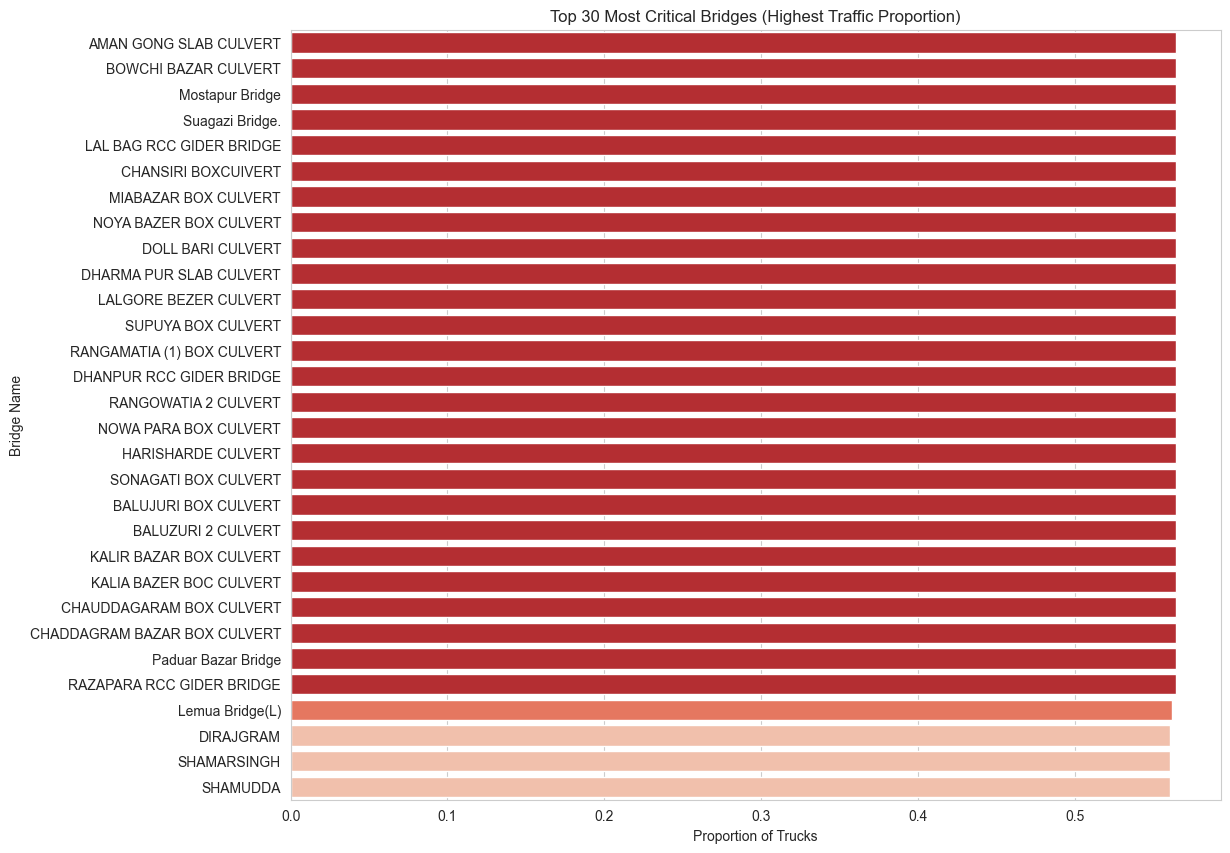

In [5]:
# Plotting top 10 most critical bridges

plt.figure(figsize=(12, 10))
# Define a custom palette with shades of red
custom_palette = sns.color_palette("Reds", n_colors=3)
barplot = sns.barplot(x='Proportion truck', y='name', data=top_30_critical, palette=custom_palette, hue ='Proportion truck', legend=False)
plt.title('Top 30 Most Critical Bridges (Highest Traffic Proportion)')
plt.xlabel('Proportion of Trucks')
plt.ylabel('Bridge Name')

plt.show()

In [6]:
print("Maximum proportion of trucks among top 30 critical bridges:", top_30_critical['Proportion truck'].max())

Maximum proportion of trucks among top 30 critical bridges: 0.5648804067005584


Highlighted in dark red is the maximum proportion of trucks among top 30 as well as top 10 critical bridges (0.5648804067005584).
To continue, we select the above top 26 bridges (dark red) with this maximum proportion of trucks.
 We therefore need to look at other identifiers of criticality, such as economic importance. To determine this, we first need to look which road(s) all the 26 bridges belong to.

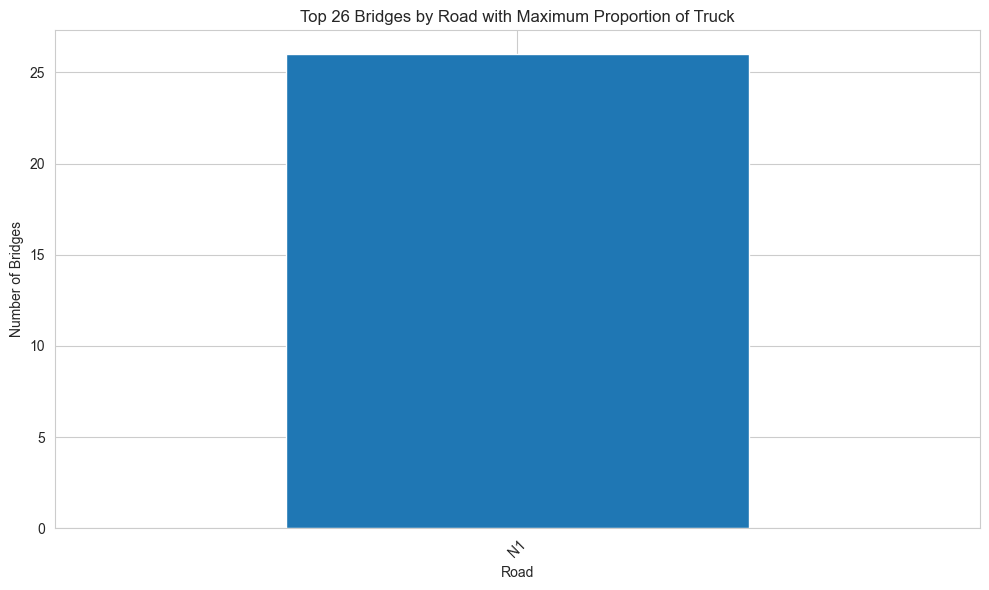

In [7]:
# Sort the DataFrame by 'Proportion truck' column in descending order and take the top 26
top_bridges = df.nlargest(26, 'Proportion truck')

# Plot the top 26 bridges by road
plt.figure(figsize=(10, 6))
top_bridges['road'].value_counts().plot(kind='bar')
plt.title('Top 26 Bridges by Road with Maximum Proportion of Truck')
plt.xlabel('Road')
plt.ylabel('Number of Bridges')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

It seems all these bridges belong to road N1. Let us also look where they are placed on the road. For the purpose of clarity, we open this exploratory map in a web browser, separate from the notebook.

In [8]:
# Create a map centered on the mean coordinates of bridges
mean_lat = top_bridges['lat'].mean()
mean_lon = top_bridges['lon'].mean()
m = folium.Map(location=[mean_lat, mean_lon], zoom_start=10, tiles='OpenStreetMap')

# Add markers for each bridge
marker_cluster = MarkerCluster().add_to(m)
for index, row in top_bridges.iterrows():
    tooltip_text = f"{row['name']} - Proportion of Truck: {row['Proportion truck']}"
    folium.Marker(location=[row['lat'], row['lon']], popup=row['name'], tooltip=tooltip_text).add_to(marker_cluster)

# Save the map to an HTML file
m.save('top_bridges_map.html')

# Open the HTML file in a web browser

webbrowser.open('top_bridges_map.html')

True

Since all the bridges are placed neatly after each other, and it is hard to determine economic importance based on this - let us decide on criticality lastly on basis of the length. The longer the bridge, the more critical (relative traffic/importance).

In [9]:
# Sort by length in descending order
condition_d_bridges_sorted = top_bridges.sort_values(by='length', ascending=False)

# Select top 10 bridges
top_10_critical_bridges = condition_d_bridges_sorted.head(10)

# Display the top 10 bridges
top_10_critical_bridges

Unnamed: 0 road  LRPName               type                       name  \
63         115   N1  LRP092a  RCC Girder Bridge        Paduar Bazar Bridge   
66         121   N1  LRP101a  RCC Girder Bridge            Suagazi Bridge.   
65         119   N1  LRP098a  RCC Girder Bridge  RAZAPARA RCC GIDER BRIDGE   
64         117   N1  LRP094a  RCC Girder Bridge            Mostapur Bridge   
69         126   N1  LRP107a        Box Culvert       MIABAZAR BOX CULVERT   
62         113   N1  LRP088a  RCC Girder Bridge   DHANPUR RCC GIDER BRIDGE   
67         123   N1  LRP104a  RCC Girder Bridge   LAL BAG RCC GIDER BRIDGE   
71         128   N1  LRP110a        Box Culvert          DOLL BARI CULVERT   
82         139   N1  LRP118b        Box Culvert       BALUJURI BOX CULVERT   
68         125   N1  LRP105a        Box Culvert        CHANSIRI BOXCUIVERT   

   condition  length  chainage        lat        lon  Proportion truck  
63         C   35.97    91.092  23.421249  91.167894           0.56488  
66         A   30.48   100.938  23.371365  91.245018           0.56488  
65         A   27.90    97.257  23.397652  91.223422           0.56488  
64         C   27.35    93.600  23.411932  91.193903           0.56488  
69         A   24.00   106.519  23.330146  91.274879           0.56488  
62         A   23.40    87.713  23.443634  91.149367           0.56488  
67         C   22.80   103.456  23.352164  91.257291           0.56488  
71         B   19.20   109.289  23.308361  91.286579           0.56488  
82         B   19.20   117.269  23.242904  91.311974           0.56488  
68         A   14.30   104.753  23.342671  91.264486           0.56488

In [10]:
print("Most critical bridges")
top_10_critical_bridge_names = top_10_critical_bridges['name'].tolist()
for i, name in enumerate(top_10_critical_bridge_names, start=1):
    print(f"{i}. {name}")

Most critical bridges
1. Paduar Bazar Bridge
2. Suagazi Bridge.
3. RAZAPARA RCC GIDER BRIDGE
4. Mostapur Bridge
5. MIABAZAR BOX CULVERT
6. DHANPUR RCC GIDER BRIDGE
7. LAL BAG RCC GIDER BRIDGE
8. DOLL BARI CULVERT
9. BALUJURI BOX CULVERT
10. CHANSIRI BOXCUIVERT


In [11]:
# Create a map centered on Bangladesh zoomed in on bridges
mc = folium.Map(location=[23.293, 91.2563], zoom_start=11)

# Add markers for each bridge with bridge name as label
for index, row in top_10_critical_bridges.iterrows():
    tooltip_text = f"Length: {row['length']}"
    folium.Marker(location=[row['lat'], row['lon']], popup=row['name'], tooltip=tooltip_text, icon=folium.Icon(color='red'),
                  icon_anchor=(0,0),).add_to(mc)
    folium.Marker([row['lat'], row['lon']], icon=folium.DivIcon(html=f'<div style="font-size: 8pt; font-weight: bold;">{row["name"]}</div>')).add_to(mc)

# Display the map
mc

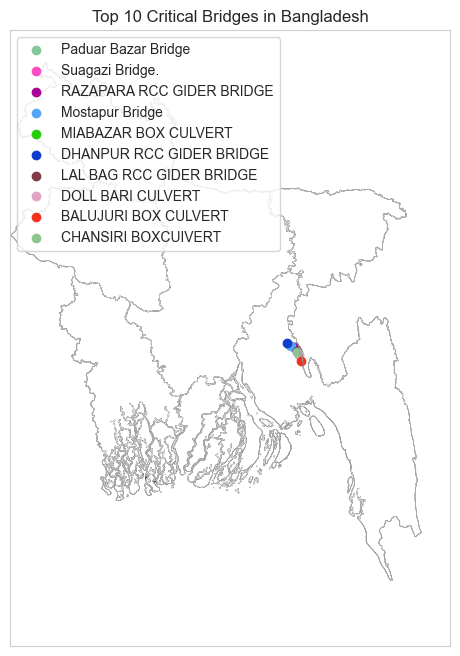

In [34]:
#Importing Shapefile
gdf = gpd.read_file('bangladesh.shp')

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import random
import geopandas as gpd

bangladesh = gdf

# Extract coordinates and bridge names from the DataFrame
lats = top_10_critical_bridges['lat'].tolist()
lons = top_10_critical_bridges['lon'].tolist()
bridge_names = top_10_critical_bridges['name'].tolist()

# Assign unique colors to each bridge name
unique_bridge_names = list(set(bridge_names))
num_unique_names = len(unique_bridge_names)
colors = plt.cm.rainbow(range(num_unique_names))

# Plotting
plt.figure(figsize=(10, 8))

# Create Basemap
m = Basemap(llcrnrlon=88.0, llcrnrlat=20.0, urcrnrlon=93.0, urcrnrlat=27.0, resolution='i', epsg=4326)
m.readshapefile('bangladesh', 'bangladesh') 

# Plot Bangladesh
for info, shape in zip(m.bangladesh_info, m.bangladesh):
    m.plot(*zip(*shape), color='lightgray', linewidth=0.5)

colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(len(lats))]
# Plot bridges with unique colors
for name, lat, lon, color in zip(bridge_names, lats, lons, colors):
    x, y = m(lon, lat)
    m.scatter(x, y, color=color, marker='o', label=name)

# Legend
plt.legend(loc='upper left')

plt.title('Top 10 Critical Bridges in Bangladesh')
plt.show()


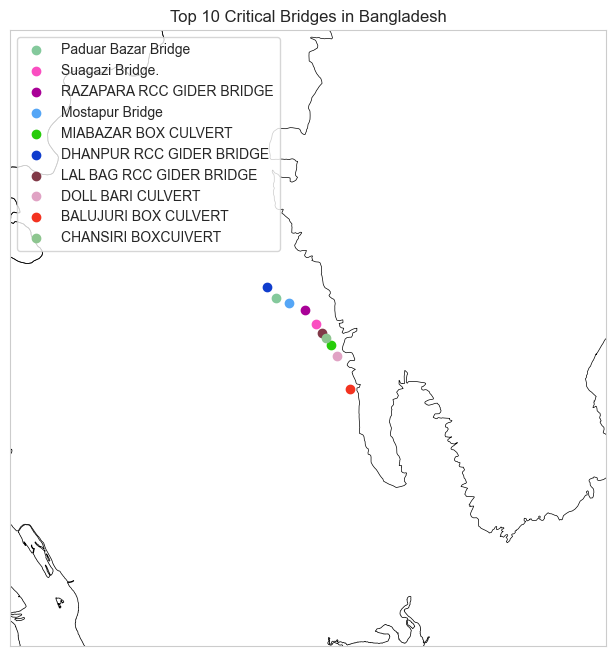

In [35]:
import random
# Extract coordinates and bridge names from the DataFrame
lats = top_10_critical_bridges['lat']
lons = top_10_critical_bridges['lon']
bridge_names = top_10_critical_bridges['name']

# Plotting
plt.figure(figsize=(10, 8))

# Create Basemap with specific region
m = Basemap(llcrnrlon=min(lons)-0.5, llcrnrlat=min(lats)-0.5,
            urcrnrlon=max(lons)+0.5, urcrnrlat=max(lats)+0.5,
            resolution='i', epsg=4326)

# Read shapefile of Bangladesh
m.readshapefile('bangladesh', 'bangladesh') 

# Plot bridges with random colors

for lat, lon, name, color in zip(lats, lons, bridge_names, colors):
    x, y = m(lon, lat)
    m.scatter(x, y, color=color, marker='o', label=name)

# Legend
plt.legend(loc='upper left')

plt.title('Top 10 Critical Bridges in Bangladesh')
plt.show()

## Vulnerability Analysis
Let us now look at the condition ratings to determine vulnerability, with as secondary vulnerability indicator length.

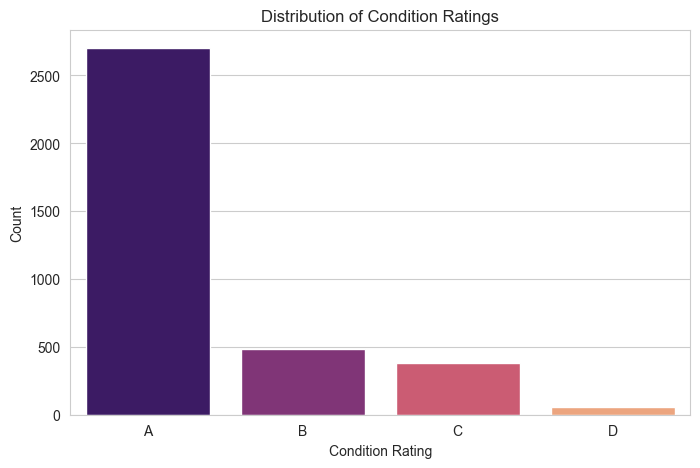

In [14]:
# Plotting distribution of condition ratings
plt.figure(figsize=(8, 5))
sns.countplot(x='condition', data=df, palette='magma', hue='condition', legend=False)
plt.title('Distribution of Condition Ratings')
plt.xlabel('Condition Rating')
plt.ylabel('Count')
plt.show()

In [15]:
# Filter DataFrame to find most vulnerable bridges (condition: D)
most_vulnerable = df[df['condition'] == 'D']

In [16]:
import plotly.express as px

# using most vulnerable data
fig = px.scatter(most_vulnerable, x='name', y='length', hover_data={'name': True, 'length': True})

fig.update_layout(title='Most Vulnerable Bridges (Condition: D)',
                  xaxis_title='Bridge Name',
                  yaxis_title='Bridge Length')

fig.show()


In [17]:
# Sort by length in descending order
condition_d_bridges_sorted = most_vulnerable.sort_values(by='length', ascending=False)

# Select top 10 bridges
top_10_condition_d_bridges = condition_d_bridges_sorted.head(10)

# Display the top 10 bridges
top_10_condition_d_bridges

Unnamed: 0  road  LRPName                   type  \
1894        2308  N403  LRP001a      RCC Girder Bridge   
905         1115  N107  LRP007a      RCC Girder Bridge   
448          556    N1  LRP396b  Steel Beam & RCC Slab   
2569        3131  N509  LRP019a      RCC Girder Bridge   
701          883  N102  LRP067c      RCC Girder Bridge   
2016        2493    N5  LRP128a      RCC Girder Bridge   
3313        3964    N8  LRP095a      RCC Girder Bridge   
1685        2051    N3  LRP075a            Box Culvert   
3110        3720  N704  LRP012c      RCC Girder Bridge   
3330        3981    N8  LRP110a            Box Culvert   

                                name condition  length  chainage        lat  \
1894               Baroikhali Bridge         D   74.10     1.870  24.099361   
905                    Military pool         D   73.00     7.288  22.340325   
448   SHAPUR STEEL BEAM AND RCC SLAB         D   61.30   400.460  21.299745   
2569                Shanamoti bridge         D   56.27    19.553  25.909438   
701                  RAMRAIL BRIDGE.         D   48.40    68.007  23.932813   
2016                  Goilhar Bridge         D   43.50   127.046  24.100657   
3313                   Amgram Bridge         D   36.76    94.098  23.198044   
1685            BORA DURA BAGSHARTRE         D   26.00    73.086  24.428766   
3110               Chandi Pur Bridge         D   24.50    12.603  23.654381   
3330              BHANGA BOX CULVERT         D   19.75   109.213  23.112350   

            lon  Proportion truck  
1894  90.098972          0.045519  
905   91.917067          0.143487  
448   92.097477          0.105842  
2569  89.365830          0.065464  
701   91.116812          0.203743  
2016  89.584132          0.201247  
3313  90.069298          0.249236  
1685  90.385959          0.368697  
3110  89.198595          0.377649  
3330  90.176876          0.271833

In [18]:
print("Most vulnerable bridges")
top_10_bridge_names = top_10_condition_d_bridges['name'].tolist()
for i, name in enumerate(top_10_bridge_names, start=1):
    print(f"{i}. {name}")

Most vulnerable bridges
1. Baroikhali Bridge
2. Military pool
3. SHAPUR STEEL BEAM AND RCC SLAB
4. Shanamoti bridge
5. RAMRAIL BRIDGE.
6. Goilhar Bridge
7. Amgram Bridge
8. BORA DURA BAGSHARTRE
9. Chandi Pur Bridge
10. BHANGA BOX CULVERT


In [19]:
# Create a map centered on Bangladesh
mv = folium.Map(location=[23.685, 90.3563], zoom_start=7)

# Add markers for each bridge with bridge name as label
for index, row in top_10_condition_d_bridges.iterrows():
    tooltip_text = f"Length: {row['length']}"
    folium.Marker(location=[row['lat'], row['lon']], popup=row['name'], tooltip=tooltip_text, icon=folium.Icon(color='red'),
                  icon_anchor=(0,0),).add_to(mv)
    folium.Marker([row['lat'], row['lon']], icon=folium.DivIcon(html=f'<div style="font-size: 10pt; font-weight: bold;">{row["name"]}</div>')).add_to(mv)

# Display the map
mv

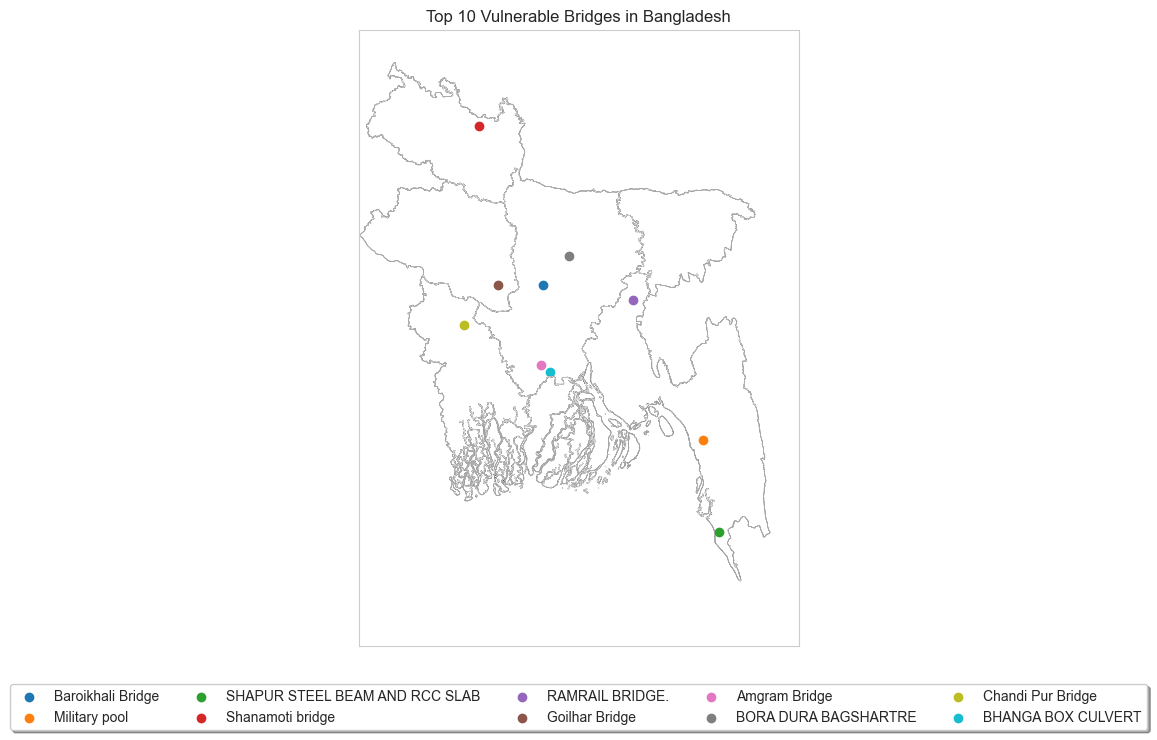

In [52]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import geopandas as gpd


# Read shapefile of Bangladesh
bangladesh = gpd.read_file('bangladesh.shp')

# Extract coordinates and bridge names from the DataFrame
lats = top_10_condition_d_bridges['lat']
lons = top_10_condition_d_bridges['lon']
bridge_names = top_10_condition_d_bridges['name']

# Define a palette of 10 colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Plotting
plt.figure(figsize=(10, 8))

# Create Basemap
m = Basemap(llcrnrlon=88.0, llcrnrlat=20.0, urcrnrlon=93.0, urcrnrlat=27.0, resolution='i', epsg=4326)
m.readshapefile('bangladesh', 'bangladesh') 

# Plot Bangladesh
for info, shape in zip(m.bangladesh_info, m.bangladesh):
    m.plot(*zip(*shape), color='lightgray', linewidth=0.5)

# Plot bridges with predefined colors
for name, lat, lon, color in zip(bridge_names, lats, lons, colors):
    x, y = m(lon, lat)
    m.scatter(x, y, color=color, marker='o', label=name)

# Legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

plt.title('Top 10 Vulnerable Bridges in Bangladesh')
plt.show()


# Correlation matrix

In [20]:
top_10_critical_bridges

Unnamed: 0 road  LRPName               type                       name  \
63         115   N1  LRP092a  RCC Girder Bridge        Paduar Bazar Bridge   
66         121   N1  LRP101a  RCC Girder Bridge            Suagazi Bridge.   
65         119   N1  LRP098a  RCC Girder Bridge  RAZAPARA RCC GIDER BRIDGE   
64         117   N1  LRP094a  RCC Girder Bridge            Mostapur Bridge   
69         126   N1  LRP107a        Box Culvert       MIABAZAR BOX CULVERT   
62         113   N1  LRP088a  RCC Girder Bridge   DHANPUR RCC GIDER BRIDGE   
67         123   N1  LRP104a  RCC Girder Bridge   LAL BAG RCC GIDER BRIDGE   
71         128   N1  LRP110a        Box Culvert          DOLL BARI CULVERT   
82         139   N1  LRP118b        Box Culvert       BALUJURI BOX CULVERT   
68         125   N1  LRP105a        Box Culvert        CHANSIRI BOXCUIVERT   

   condition  length  chainage        lat        lon  Proportion truck  
63         C   35.97    91.092  23.421249  91.167894           0.56488  
66         A   30.48   100.938  23.371365  91.245018           0.56488  
65         A   27.90    97.257  23.397652  91.223422           0.56488  
64         C   27.35    93.600  23.411932  91.193903           0.56488  
69         A   24.00   106.519  23.330146  91.274879           0.56488  
62         A   23.40    87.713  23.443634  91.149367           0.56488  
67         C   22.80   103.456  23.352164  91.257291           0.56488  
71         B   19.20   109.289  23.308361  91.286579           0.56488  
82         B   19.20   117.269  23.242904  91.311974           0.56488  
68         A   14.30   104.753  23.342671  91.264486           0.56488

In [21]:
top_10 = top_10_critical_bridges[['name','condition','length','lat','lon']]
top_10

name condition  length        lat        lon
63        Paduar Bazar Bridge         C   35.97  23.421249  91.167894
66            Suagazi Bridge.         A   30.48  23.371365  91.245018
65  RAZAPARA RCC GIDER BRIDGE         A   27.90  23.397652  91.223422
64            Mostapur Bridge         C   27.35  23.411932  91.193903
69       MIABAZAR BOX CULVERT         A   24.00  23.330146  91.274879
62   DHANPUR RCC GIDER BRIDGE         A   23.40  23.443634  91.149367
67   LAL BAG RCC GIDER BRIDGE         C   22.80  23.352164  91.257291
71          DOLL BARI CULVERT         B   19.20  23.308361  91.286579
82       BALUJURI BOX CULVERT         B   19.20  23.242904  91.311974
68        CHANSIRI BOXCUIVERT         A   14.30  23.342671  91.264486

In [22]:
# Define mapping dictionary
condition_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4}  # Add more mappings if needed

# Make a copy of the DataFrame
top_10_df = top_10.copy()

# Map condition values to numerical values
top_10_df['condition'] = top_10_df['condition'].map(condition_mapping)

# Display the modified DataFrame
top_10_df


name  condition  length        lat        lon
63        Paduar Bazar Bridge          3   35.97  23.421249  91.167894
66            Suagazi Bridge.          1   30.48  23.371365  91.245018
65  RAZAPARA RCC GIDER BRIDGE          1   27.90  23.397652  91.223422
64            Mostapur Bridge          3   27.35  23.411932  91.193903
69       MIABAZAR BOX CULVERT          1   24.00  23.330146  91.274879
62   DHANPUR RCC GIDER BRIDGE          1   23.40  23.443634  91.149367
67   LAL BAG RCC GIDER BRIDGE          3   22.80  23.352164  91.257291
71          DOLL BARI CULVERT          2   19.20  23.308361  91.286579
82       BALUJURI BOX CULVERT          2   19.20  23.242904  91.311974
68        CHANSIRI BOXCUIVERT          1   14.30  23.342671  91.264486

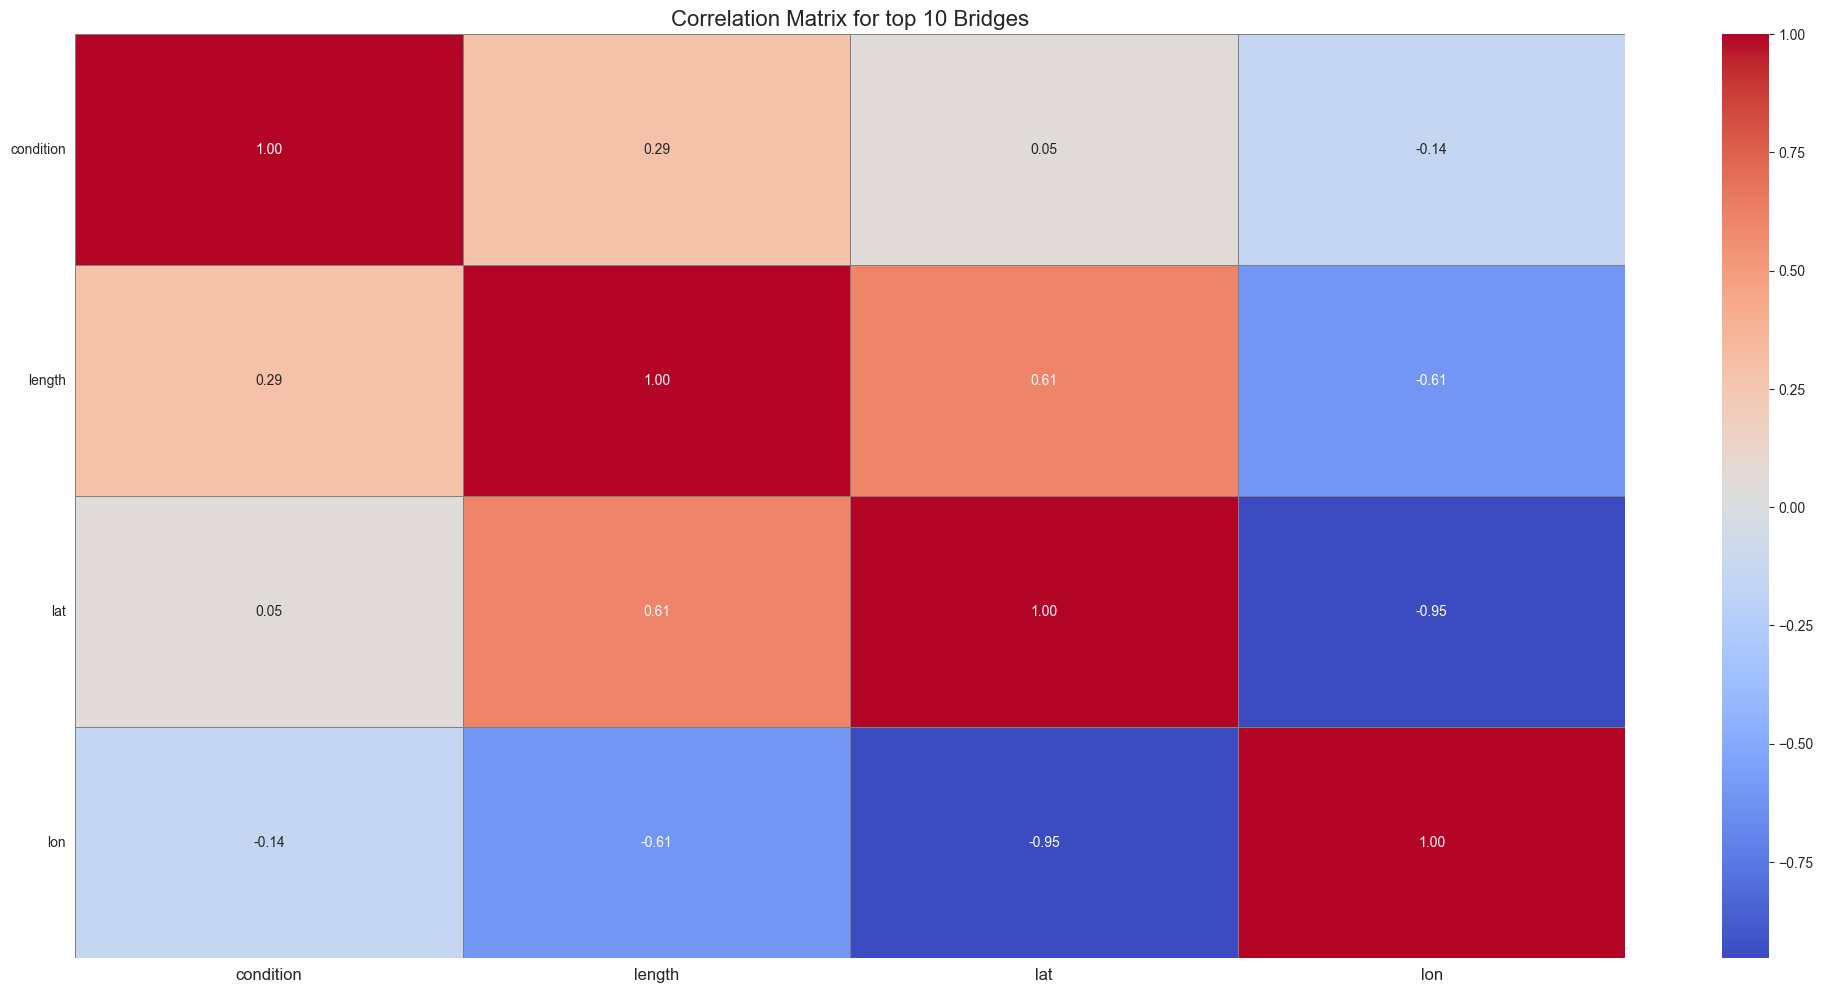

In [23]:
# Select only numeric columns for correlation calculation
numeric_columns = top_10_df.select_dtypes(include=np.number)

# Calculate the correlation matrix for numeric variables
correlation_matrix = numeric_columns.corr()

# Create a correlation heatmap
plt.figure(figsize=(25, 12))
heatmap = sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5, linecolor='gray')
plt.title('Correlation Matrix for top 10 Bridges', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(rotation=0)  # Rotate the y-axis labels by 90 degrees
plt.show()

### Sorted correlation matrix

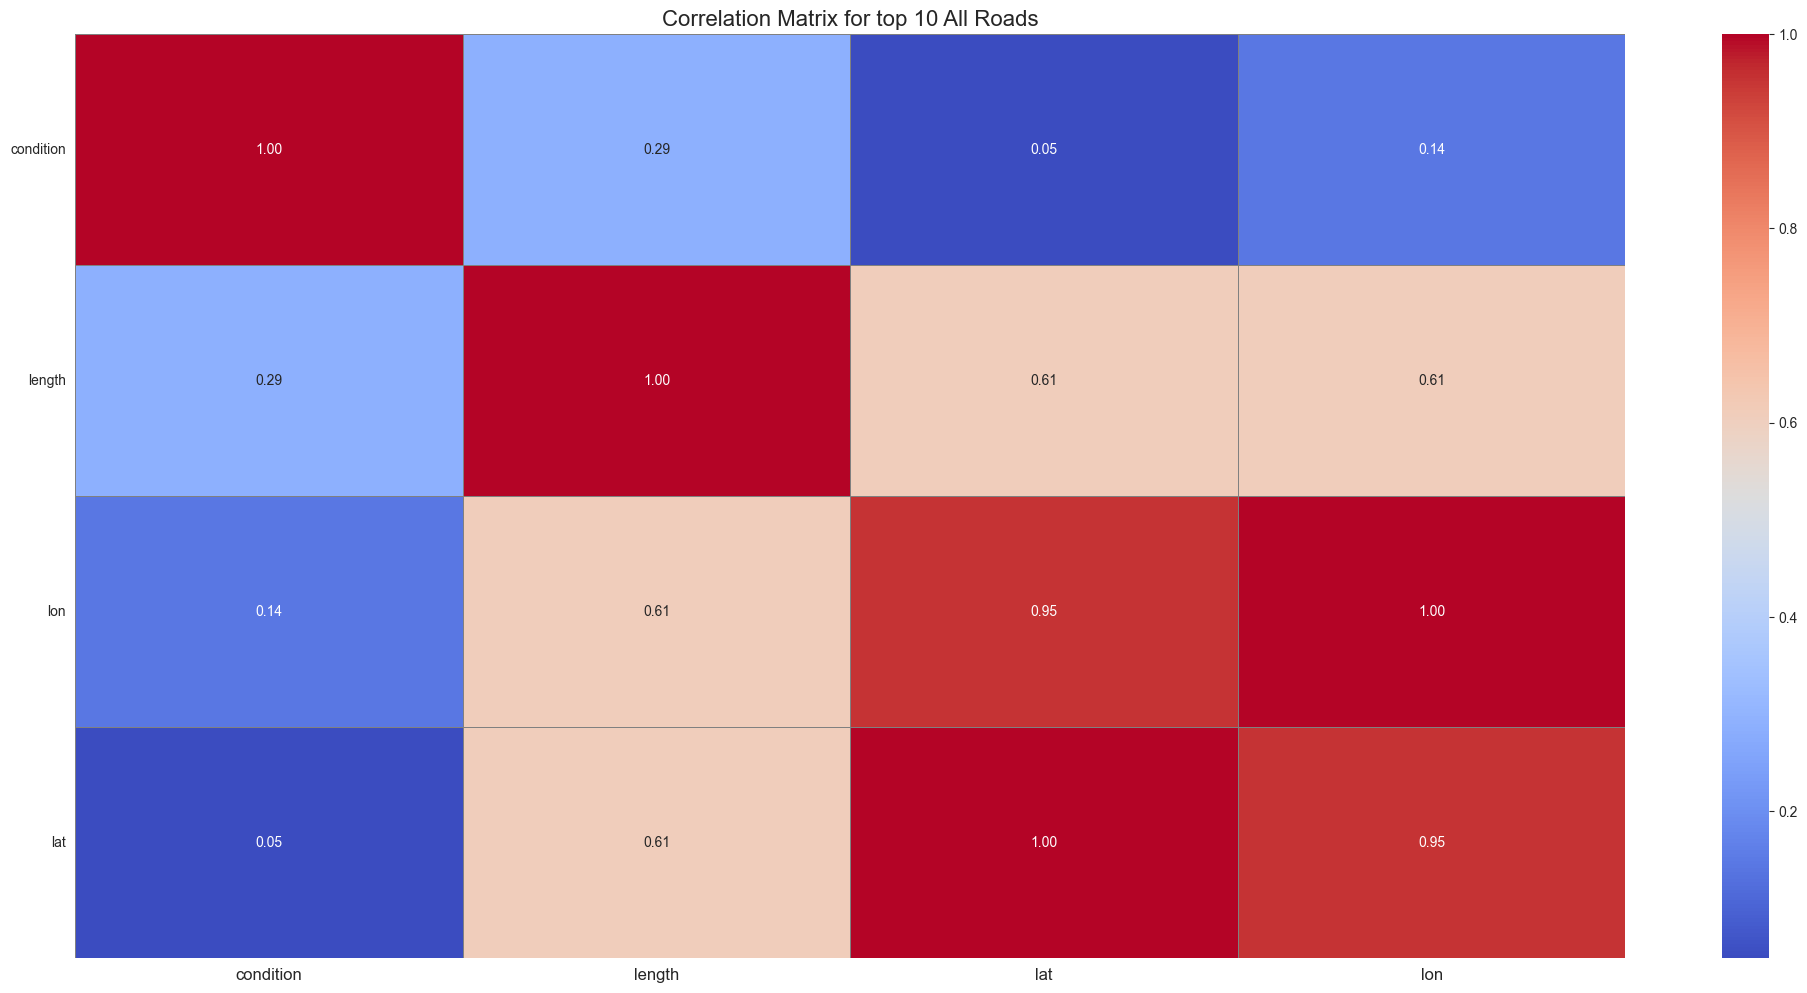

In [24]:
# Select only numeric columns for correlation calculation
numeric_columns = top_10_df.select_dtypes(include=np.number)

# Calculate the correlation matrix for numeric variables
correlation_matrix = numeric_columns.corr()

# Sort the correlation matrix values
correlation_matrix_sorted = correlation_matrix.abs().sort_values(by=correlation_matrix.columns.tolist(), axis=0, ascending=False)

# Create a correlation heatmap
plt.figure(figsize=(25, 12))
heatmap = sns.heatmap(correlation_matrix_sorted, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5, linecolor='gray')
plt.title('Correlation Matrix for top 10 All Roads', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(rotation=0)  # Rotate the y-axis labels by 90 degrees
plt.show()

# Vulnerability matrix (Bram)

### Most critical Bridges = busiest

In [25]:
top_10_critical_bridges

Unnamed: 0 road  LRPName               type                       name  \
63         115   N1  LRP092a  RCC Girder Bridge        Paduar Bazar Bridge   
66         121   N1  LRP101a  RCC Girder Bridge            Suagazi Bridge.   
65         119   N1  LRP098a  RCC Girder Bridge  RAZAPARA RCC GIDER BRIDGE   
64         117   N1  LRP094a  RCC Girder Bridge            Mostapur Bridge   
69         126   N1  LRP107a        Box Culvert       MIABAZAR BOX CULVERT   
62         113   N1  LRP088a  RCC Girder Bridge   DHANPUR RCC GIDER BRIDGE   
67         123   N1  LRP104a  RCC Girder Bridge   LAL BAG RCC GIDER BRIDGE   
71         128   N1  LRP110a        Box Culvert          DOLL BARI CULVERT   
82         139   N1  LRP118b        Box Culvert       BALUJURI BOX CULVERT   
68         125   N1  LRP105a        Box Culvert        CHANSIRI BOXCUIVERT   

   condition  length  chainage        lat        lon  Proportion truck  
63         C   35.97    91.092  23.421249  91.167894           0.56488  
66         A   30.48   100.938  23.371365  91.245018           0.56488  
65         A   27.90    97.257  23.397652  91.223422           0.56488  
64         C   27.35    93.600  23.411932  91.193903           0.56488  
69         A   24.00   106.519  23.330146  91.274879           0.56488  
62         A   23.40    87.713  23.443634  91.149367           0.56488  
67         C   22.80   103.456  23.352164  91.257291           0.56488  
71         B   19.20   109.289  23.308361  91.286579           0.56488  
82         B   19.20   117.269  23.242904  91.311974           0.56488  
68         A   14.30   104.753  23.342671  91.264486           0.56488

### Most vulnerable Bridges = longest and in worst condition

In [26]:
top_10_condition_d_bridges

Unnamed: 0  road  LRPName                   type  \
1894        2308  N403  LRP001a      RCC Girder Bridge   
905         1115  N107  LRP007a      RCC Girder Bridge   
448          556    N1  LRP396b  Steel Beam & RCC Slab   
2569        3131  N509  LRP019a      RCC Girder Bridge   
701          883  N102  LRP067c      RCC Girder Bridge   
2016        2493    N5  LRP128a      RCC Girder Bridge   
3313        3964    N8  LRP095a      RCC Girder Bridge   
1685        2051    N3  LRP075a            Box Culvert   
3110        3720  N704  LRP012c      RCC Girder Bridge   
3330        3981    N8  LRP110a            Box Culvert   

                                name condition  length  chainage        lat  \
1894               Baroikhali Bridge         D   74.10     1.870  24.099361   
905                    Military pool         D   73.00     7.288  22.340325   
448   SHAPUR STEEL BEAM AND RCC SLAB         D   61.30   400.460  21.299745   
2569                Shanamoti bridge         D   56.27    19.553  25.909438   
701                  RAMRAIL BRIDGE.         D   48.40    68.007  23.932813   
2016                  Goilhar Bridge         D   43.50   127.046  24.100657   
3313                   Amgram Bridge         D   36.76    94.098  23.198044   
1685            BORA DURA BAGSHARTRE         D   26.00    73.086  24.428766   
3110               Chandi Pur Bridge         D   24.50    12.603  23.654381   
3330              BHANGA BOX CULVERT         D   19.75   109.213  23.112350   

            lon  Proportion truck  
1894  90.098972          0.045519  
905   91.917067          0.143487  
448   92.097477          0.105842  
2569  89.365830          0.065464  
701   91.116812          0.203743  
2016  89.584132          0.201247  
3313  90.069298          0.249236  
1685  90.385959          0.368697  
3110  89.198595          0.377649  
3330  90.176876          0.271833

In [27]:
def vul_matrix(df):
    # Define mapping dictionary
    condition_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4}  # Add more mappings if needed
    
    # Make a copy of the DataFrame
    cdf = df.copy()
    
    # Map condition values to numerical values
    cdf['condition'] = cdf['condition'].map(condition_mapping)
    
    # Display the modified DataFrame
    df = cdf
    
    # Normalize the length values
    df['normalized_length'] = df['length'] / df['length'].max()
    
    # Calculate vulnerability for each bridge
    df['vulnerability'] = df['condition'] + df['normalized_length']
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df['vulnerability'], df['Proportion truck'])
    
    # Annotate each point with name and LRPName
    for i, row in df.iterrows():
        plt.text(row['vulnerability'], row['Proportion truck'], f"{row['name']} ({row['LRPName']})", fontsize=8, rotation=45)


    plt.xlabel('Vulnerability (Condition + Normalized Length)')
    plt.ylabel('Traffic Flow (Criticality)')
    plt.title('Bridges: Traffic Flow vs Vulnerability')
    plt.grid(True)
    plt.show()
    return

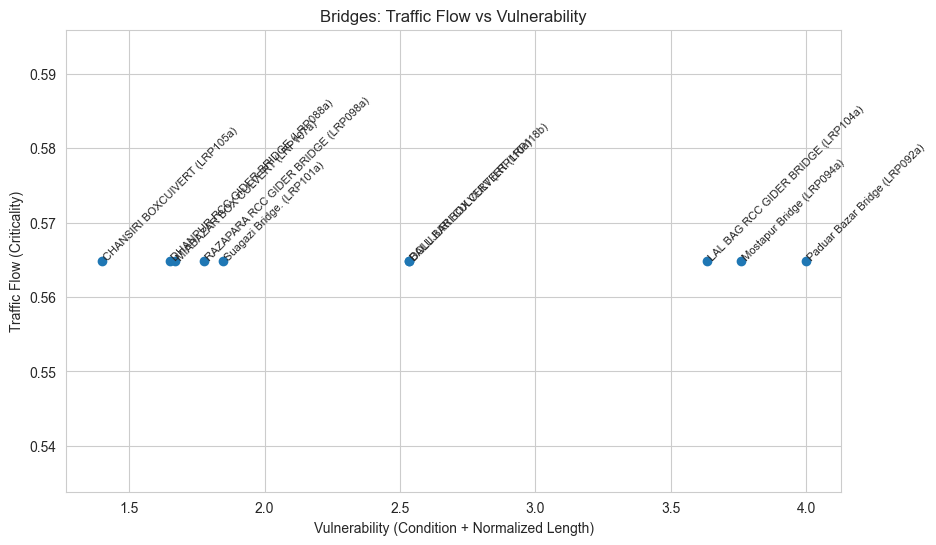

In [28]:
vul_matrix(top_10_critical_bridges)

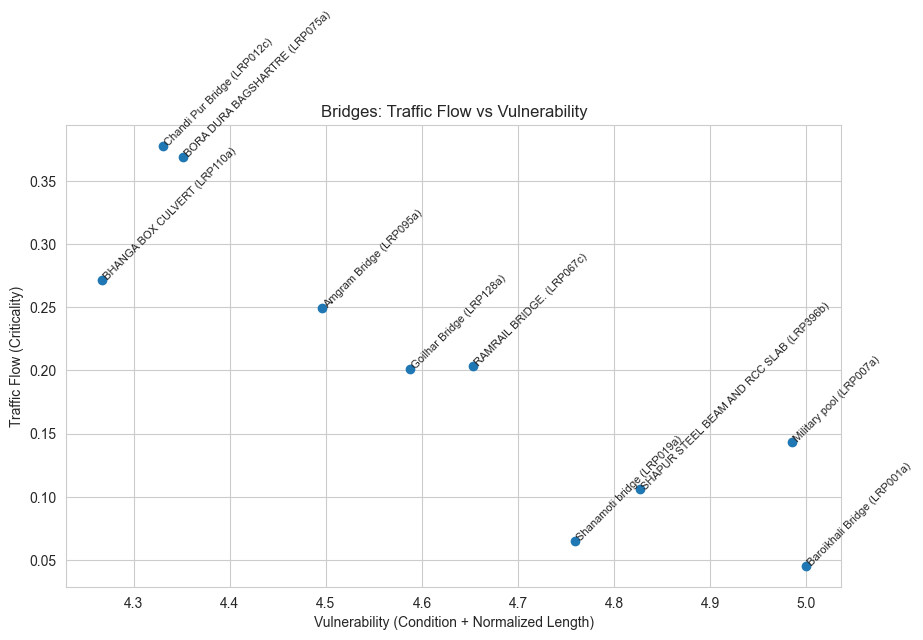

In [29]:
vul_matrix(top_10_condition_d_bridges)